In [31]:
# Libraries Import

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import ipywidgets as widgets
from IPython.display import Markdown, SVG
from datetime import datetime
import random
import urllib.request, json 
import gspread

In [2]:
# Import Data

In [3]:
#with urllib.request.urlopen("https://xaisurvey.s3.amazonaws.com/survey_bot.json") as url:
#    survey_bot = json.loads(url.read().decode())

In [4]:
# Datetime survey starts
survey_starts_at = datetime.now()
datetime_survey_start = survey_starts_at.strftime("%d/%m/%Y %H:%M:%S")

In [5]:
# Dataset Load
data = arff.loadarff("./datasets/WINE.txt.arff")
dataset = pd.DataFrame(data[0])

In [6]:
def labelConversion(label):
    if label == b'1':
        return '1'
    elif label == b'2':
        return '2'
    else:
        return '3'

dataset['Class'] = dataset['Class'].apply(lambda x: labelConversion(x))

In [7]:
next_button = widgets.Button(
    description='Next'
)
output = widgets.Output()

with output:
    output.clear_output()
    display(Markdown("# Survey of the interpretability of decision trees"))
    display(Markdown('''This questionnaire aims to evaluate the interpretability of decision trees. We want to understand what makes a decision tree more interpretable than others. This survey uses an activity-based rating in which we ask you to solve a problem, and each question comes with a few rating questions related to the activity.

This study is done for research purposes and carried out by researchers from the University of Bolzano. We collect information that agrees with the European Union's General Data Protection Regulation (GDPR). The data collected is for research purposes only and based on non-personal or anonymous data provided during your voluntary participation.

The survey takes 10 minutes to complete.

In case of questions or doubts, send an email to Marco.Zenere@stud-inf.unibz.it.'''))
    display(Markdown('''By continuing this questionnaire, you confirm that:

- You have reached the age of majority
- You acknowledge that your participation is completely voluntary
- You acknowledge that your anonymous responses may be used for research purposes in accordance with General Data Protection Regulation'''))

    
display(output,next_button)

def next_clicked(b):
    output.clear_output()
    with output:
        display(Markdown('## Introduction'))
        display(Markdown('''The data used in this questionnaire is part of the wine dataset provided by UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline

    This questionnaire considers decision tree representation in the form depicted below.'''))
    
next_button.on_click(next_clicked)

Output()

Button(description='Next', style=ButtonStyle())

This questionnaire aims to evaluate the interpretability of decision trees. We want to understand what makes a decision tree more interpretable than others. This survey uses an activity-based rating in which we ask you to solve a problem, and each question comes with a few rating questions related to the activity.

This study is done for research purposes and carried out by researchers from the University of Bolzano. We collect information that agrees with the European Union's General Data Protection Regulation (GDPR). The data collected is for research purposes only and based on non-personal or anonymous data provided during your voluntary participation.

The survey takes 10 minutes to complete.

In case of questions or doubts, send an email to Marco.Zenere@stud-inf.unibz.it.

By continuing this questionnaire, you confirm that:

- You have reached the age of majority
- You acknowledge that your participation is completely voluntary
- You acknowledge that your anonymous responses may be used for research purposes in accordance with General Data Protection Regulation

---

## Introduction

The data used in this questionnaire is part of the wine dataset provided by UCI. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

This questionnaire considers decision tree representation in the form depicted below.

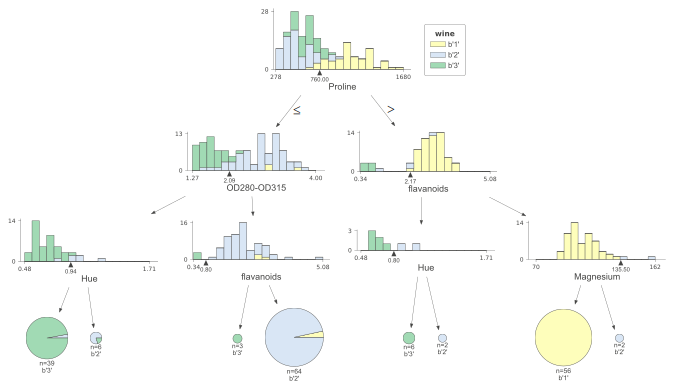

In [38]:
SVG(filename='./Images/Decision_Tree_3_layers.svg')

### How to interpret the decision tree?

A decision tree is a tree-like model that checks one attribute/feature at a time of a given instance to classify it in one of the classes of the domain of interest. A decision tree is made up of several levels and nodes. Each level is composed of one or more nodes, and the nodes correspond to the features of the domain of interest. Typically, a decision tree considers part of the available features, which correspond to those most relevant to correctly classifying an instance of the domain.  Each node evaluates whether the value of the considered attribute is above a specific threshold. If the attribute value exceeds the threshold, the decision tree will test the attribute on the right path. Otherwise, it will test the one on the left path. In the decision tree representation of the following survey, the threshold of each node is represented by the black triangle in the histogram, and each node is a histogram. To classify an instance of the domain of interest, the decision tree must reach one of the leaf nodes starting from the root node. A leaf node could be impure, so there could be the case where the leaf node contains multiple classes. The decision tree representation in the following survey highlights the composition of each leaf node and indicates the dominant class.

Let's take a look at an example.

---

Considering we have a wine instance with the following features: 

In [39]:
example = dataset.iloc[1][:-1].to_frame()
example.rename(columns = {example.columns[0]:''}, inplace = True)
display(example.transpose())

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0


Let's consider the following decision tree representation.

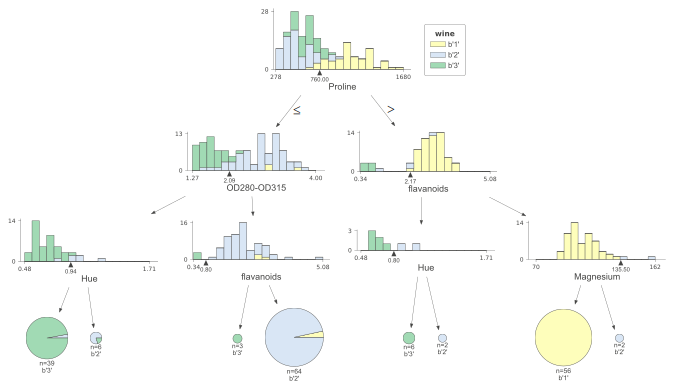

In [40]:
# Example 1
SVG(filename='./Images/Decision_Tree_3_layers.svg')

Considering the above decision tree representation and starting from the top level of the decision tree, the first feature to consider is the Proline. The value of the example is above the threshold of 760.0, so we need to take the right path of the decision tree and continue to go through the tree.  The next feature we need to consider is Flavanoids, and the example has a value above the threshold of 2.17 and as before we need to take the right path of the decision tree and continue to go through the tree. The last feature to consider before the classification of the example is Magnesium. Our example has a value under the threshold of 135.50, and by taking the left path of the decision tree, we can conclude that the wine is of Class 1.

Before starting the survey, let's do a quick warm-up to understand whether or not the concept is clear.

---

Considering we have a wine with the following features: 

Let's consider the decision tree representation below.

In [44]:
example_selection_1 = widgets.RadioButtons(
    options=[('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')],
    value=None,
    disabled=False
)

### Which class correspond the wine with the following features ?

In [45]:
example_selection_1

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Which of the following features/attributes did you consider for the classification?

In [46]:
example_selection_2 = widgets.RadioButtons(
    options=[('Proline, OD280/OD315, and Flavanoids', '1'), ('Proline, OD280/OD315, and Hue', '2'), ('Proline, Flavanoids, and Magnesium', '3'), ('Proline, Flavanoids, and Hue', '4')],
    value=None,
    disabled=False
)

In [47]:
example_selection_2

RadioButtons(options=(('Proline, OD280/OD315, and Flavanoids', '1'), ('Proline, OD280/OD315, and Hue', '2'), (…

The warm-up is completed. Continue to read the instructions of the survey.

---

The questionnaire is composed of five questions, and each of them is composed of the following elements:

- A wine instance features
- Two decision tree representations of the same domain of interest
- A set of mandatory questions: three questions for evaluating the decision tree representations, one for specifying the classification of the given wine instance
- An optional section for leaving additional comments

After completing the five questions, there will be four questions to understand who you are, to be able to do a demographic analysis of the participants.

You can start the survey.

In [48]:
questions_selection_1 = []
questions_selection_2 = []
questions_slider_1 = []
questions_slider_2 = []
questions_text_area = []

for x in range(5):
    questions_selection_1.append(widgets.RadioButtons(
        options=[('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')],
        value=None,
        disabled=False
    ))

    questions_slider_1.append(widgets.SelectionSlider(
        options=[' 1', '2', '3', '4', '5'],
        value='3',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True
    ))

    questions_slider_2.append(widgets.SelectionSlider(
        options=[' 1', '2', '3', '4', '5'],
        value='3',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True
    ))

    questions_selection_2.append(widgets.RadioButtons(
        options=[('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')],
        value=None,
        disabled=False
    ))

    questions_text_area.append(widgets.Textarea(
        value='',
        disabled=False
    ))

questions_samples = [dataset.iloc[0],dataset.iloc[58],dataset.iloc[164],dataset.iloc[177],dataset.iloc[156]]
correct_classifications = []

In [49]:
random.shuffle(questions_samples)

for n,sample in zip(range(5),questions_samples.copy()):
    correct_classifications.append(questions_samples[n][-1])
    questions_samples[n] = questions_samples[n][:-1]

## Question 1

Considering a wine instance with the following features:

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


Let's consider the following two decision tree representations of the same domain:

### Decision Tree Representation 1

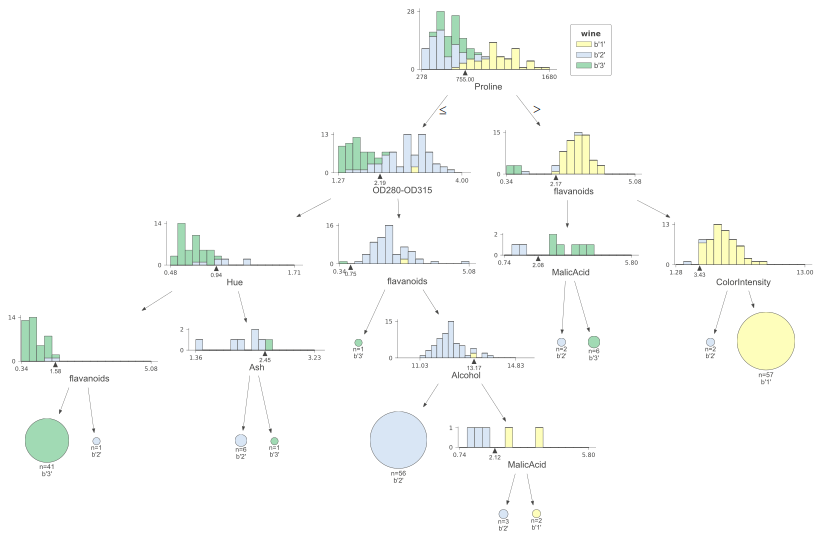

### Decision Tree Representation 2

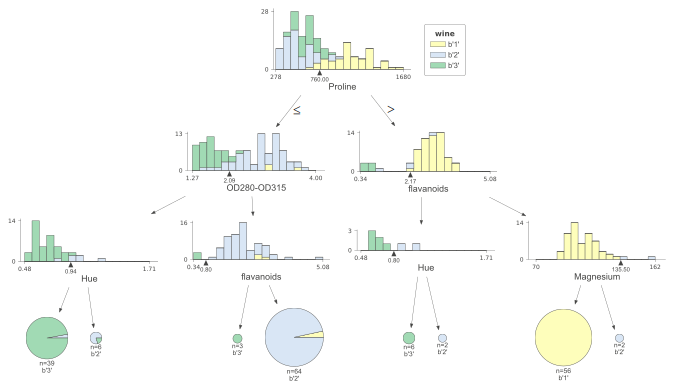

### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?

RadioButtons(options=(('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')), value…

### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### Which class correspond the wine with the following features?

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Additional Comment (optional)

Textarea(value='')

---

## Question 2

Considering a wine instance with the following features:

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


Let's consider the following two decision tree representations of the same domain:

### Decision Tree Representation 1

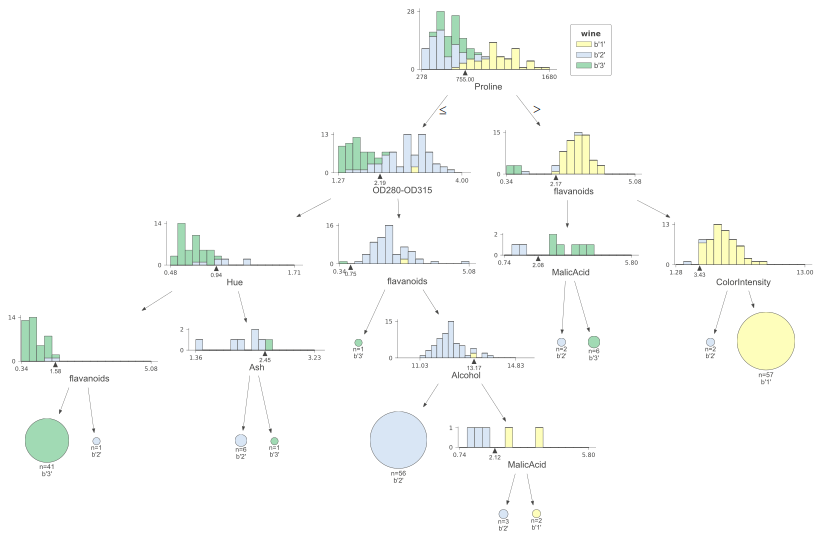

### Decision Tree Representation 2

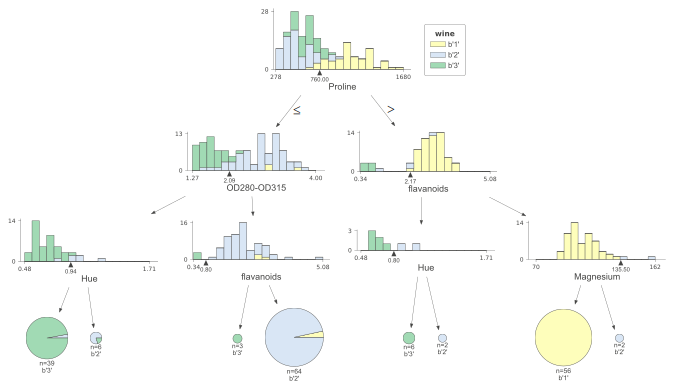

### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?

RadioButtons(options=(('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')), value…

### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### Which class correspond the wine with the following features?

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Additional Comment (optional)

Textarea(value='')

---

## Question 3

Considering a wine instance with the following features:

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,13.4,3.91,2.48,23.0,102.0,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750.0


Let's consider the following two decision tree representations of the same domain:

### Decision Tree Representation 1

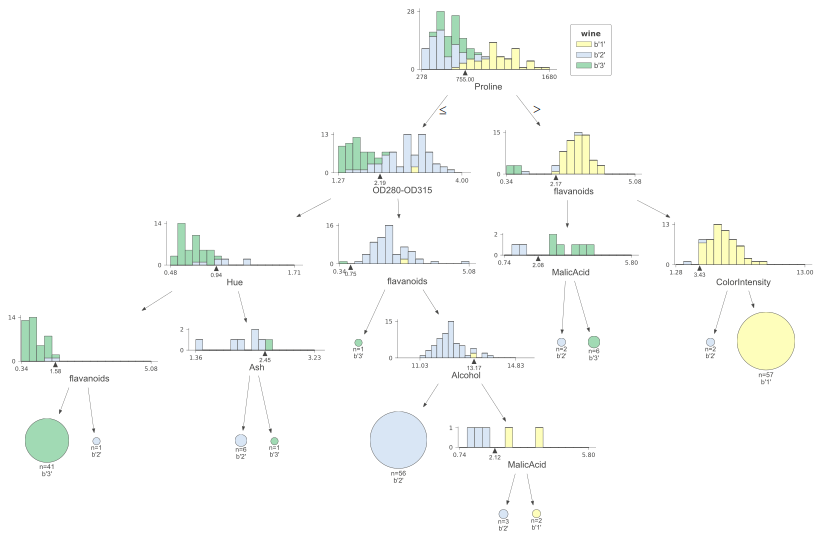

### Decision Tree Representation 2

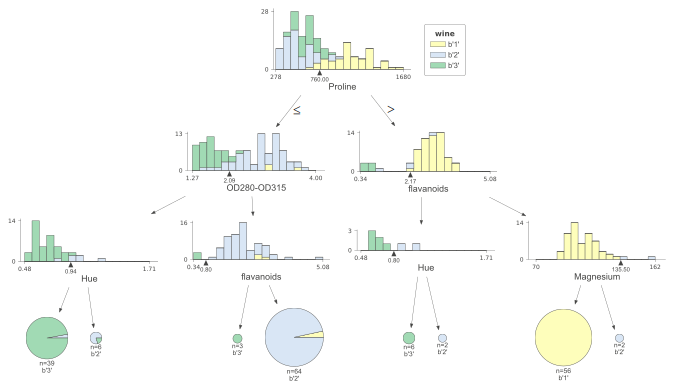

### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?

RadioButtons(options=(('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')), value…

### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### Which class correspond the wine with the following features?

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Additional Comment (optional)

Textarea(value='')

---

## Question 4

Considering a wine instance with the following features:

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,12.37,1.13,2.16,19.0,87.0,3.5,3.1,0.19,1.87,4.45,1.22,2.87,420.0


Let's consider the following two decision tree representations of the same domain:

### Decision Tree Representation 1

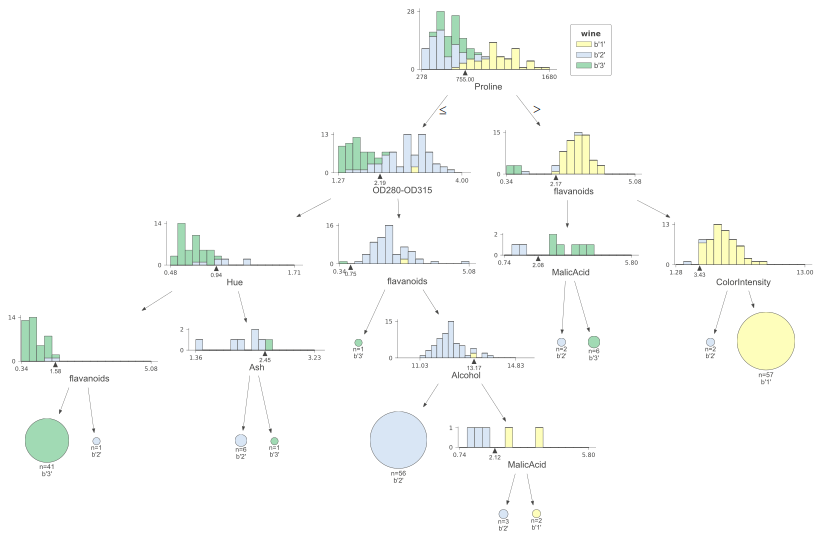

### Decision Tree Representation 2

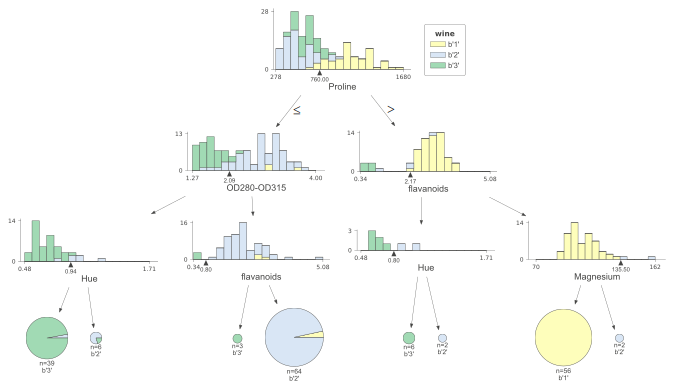

### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?

RadioButtons(options=(('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')), value…

### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### Which class correspond the wine with the following features?

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Additional Comment (optional)

Textarea(value='')

---

## Question 5

Considering a wine instance with the following features:

,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,flavanoids,NonflavanoidsPhenols,Proanthocyanins,ColorIntensity,Hue,OD280-OD315,Proline
,13.74,1.67,2.25,16.4,118.0,2.6,2.9,0.21,1.62,5.85,0.92,3.2,1060.0


Let's consider the following two decision tree representations of the same domain:

### Decision Tree Representation 1

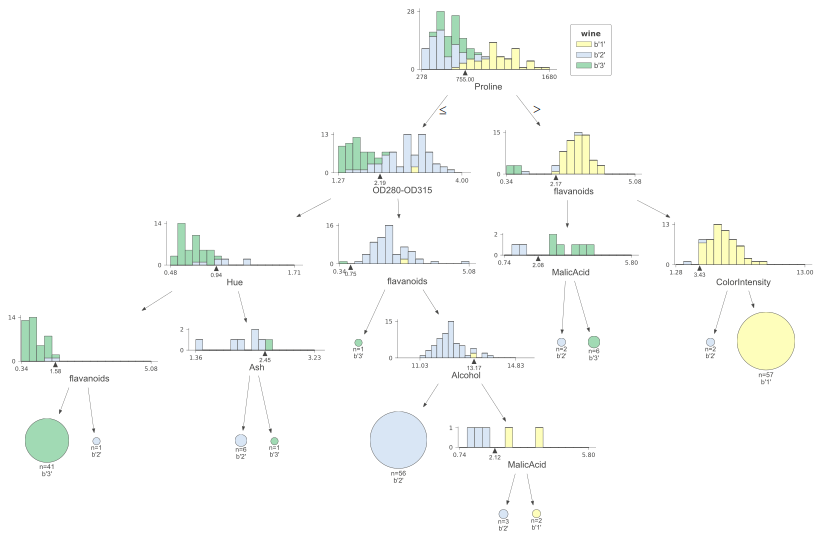

### Decision Tree Representation 2

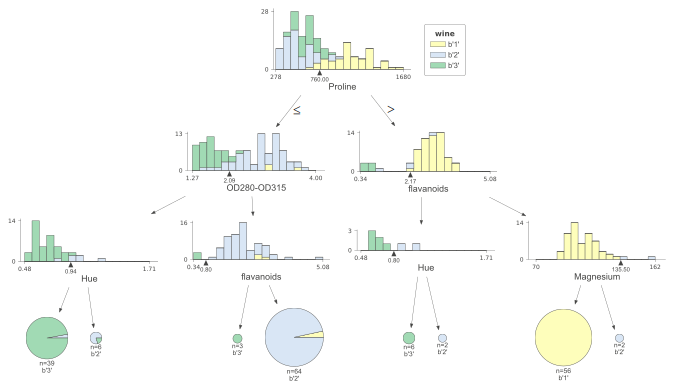

### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?

RadioButtons(options=(('Decision tree representation 1', '1'), ('Decision tree representation 2', '2')), value…

### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied

SelectionSlider(continuous_update=False, index=2, options=(' 1', '2', '3', '4', '5'), value='3')

### Which class correspond the wine with the following features?

RadioButtons(options=(('Class 1', '1'), ('Class 2', '2'), ('Class 3', '3')), value=None)

### Additional Comment (optional)

Textarea(value='')

---

In [50]:
# Random sorting of the questions

for i, sample in zip(range(5), questions_samples):
    display(Markdown('## Question %s'%(str(i + 1))))
    display(Markdown('''Considering a wine instance with the following features:'''))
    sample_DataFrame = sample.to_frame()
    sample_DataFrame.rename(columns = {sample_DataFrame.columns[0]:''}, inplace = True)
    display(sample_DataFrame.transpose())
    display(Markdown("Let's consider the following two decision tree representations of the same domain:"))
    display(Markdown("### Decision Tree Representation 1"))
    display(SVG(filename='./Images/Decision_Tree_5_layers.svg'))
    display(Markdown("### Decision Tree Representation 2"))
    display(SVG(filename='./Images/Decision_Tree_3_layers.svg'))
    display(Markdown("### Which of the above decision tree representations do you think is the more interpretable for classifying the wine instance?"))
    display(questions_selection_1[i])
    display(Markdown('''### How much more interpretable is the decision tree that you think is more interpretable? 
Where 1 means not so much more interpretable, instead 5 means a lot more interpretable'''))
    display(questions_slider_1[i])
    display(Markdown('''### How much are you satisfied with the interpretability of the decision tree you think is more interpretable?
Where 1 means not satisfied, instead 5 means a lot satisfied'''))
    display(questions_slider_2[i])
    display(Markdown("### Which class correspond the wine with the following features?"))
    display(questions_selection_2[i])
    display(Markdown("### Additional Comment (optional)"))
    display(questions_text_area[i])
    display(Markdown("---"))

We would like to collect some information about you to do a demographic analysis of the participants in our survey.

### Gender

In [51]:
gender_selection = widgets.RadioButtons(
    options=[('Male', '1'), ('Female', '2'), ('Other', '3')],
    value=None,
    disabled=False
)

In [52]:
gender_selection

RadioButtons(options=(('Male', '1'), ('Female', '2'), ('Other', '3')), value=None)

### Age

In [53]:
age_selection = widgets.RadioButtons(
    options=[('18-20', '1'), ('21-29', '2'), ('30-39', '3'),('40-49', '4'),('50-59', '5'),('60 or older', '6')],
    value=None,
    disabled=False
)

In [54]:
age_selection

RadioButtons(options=(('18-20', '1'), ('21-29', '2'), ('30-39', '3'), ('40-49', '4'), ('50-59', '5'), ('60 or …

### Education

In [55]:
education_selection = widgets.RadioButtons(
    options=[('Less than high school degree', '1'), ('High school degree or equivalent', '2'), ('Bachelor degree', '3'),('Graduate degree', '4')],
    value=None,
    disabled=False
)

In [56]:
education_selection

RadioButtons(options=(('Less than high school degree', '1'), ('High school degree or equivalent', '2'), ('Bach…

### English Level

In [57]:
english_level_selection = widgets.RadioButtons(
    options=[('A1', '1'), ('A2', '2'), ('B1', '3'), ('B2', '4'), ('C1', '5'), ('C2', '6')],
    value=None,
    disabled=False
)

In [58]:
english_level_selection

RadioButtons(options=(('A1', '1'), ('A2', '2'), ('B1', '3'), ('B2', '4'), ('C1', '5'), ('C2', '6')), value=Non…